<a href="https://colab.research.google.com/github/xpandalord/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


Confidence Intervals:
1. Generate and numerically represent a confidence interval.

In [0]:
# TODO - your code!
# Imports.
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Get the data.
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-05-23 02:59:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.07s   

2020-05-23 02:59:03 (255 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [82]:
# Make it into a dataframe.
column_headers = ['Class Name', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools',
                  'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime',
                  'duty-free-exports', 'export-administration-act-south-africa']
df = pd.read_csv('house-votes-84.data', header = None, names = column_headers, na_values = '?')
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [83]:
# Recode votes as numeric.
df = df.replace({'y': 1, 'n': 0})
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# Create the confidence interval function.
def confidence_intervals(data, confidence = 0.95):
  """
  Calculate a confidence interval around a sample mean for the given data.
  Using t-distribution and two-tailed test, with default 95% confidence.

  Arguments:
  data - iterable (list or numpy array) of sample observations
  confidence - level of confidence for the interval

  Returns:
  tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof = 1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1) # Just looking up the corresponding t-statistic.
  return (mean, mean - moe, mean + moe)

In [85]:
# Remove NaN values from this column.
col = df['handicapped-infants']
np.isnan(col)
handicapped_infants_no_nans = col[~np.isnan(col)]
handicapped_infants_no_nans

0      0.0
1      0.0
3      0.0
4      1.0
5      0.0
      ... 
430    0.0
431    0.0
432    0.0
433    0.0
434    0.0
Name: handicapped-infants, Length: 423, dtype: float64

In [86]:
# Create a confidence interval for our example.
confidence_intervals(handicapped_infants_no_nans)

(0.44208037825059104, 0.39456046308364673, 0.48960029341753536)

2. Graphically (with a plot) represent the confidence interval

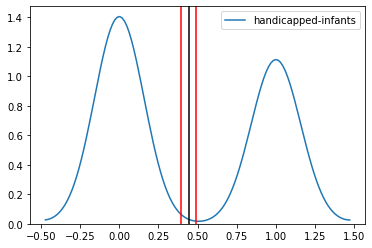

In [87]:
# Kernel Density Estimate.
sns.kdeplot(handicapped_infants_no_nans)
CI = confidence_intervals(handicapped_infants_no_nans)
colors = ['k', 'red', 'red']
for i in range(0,3):
  plt.axvline(x = CI[i], color = colors[i])

3. Interpret the confidence interval - what does it tell you about the data and its distribution?

If we sampled all members of the house of representative an infinite number of times, we would expect the average votes to support handicapped infants to lie within [0.395, 0.490], 95% of the time.

Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy

In [88]:
# Pulling and creating our dataframe.
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [89]:
# Checking just the categorical variables.
df.describe(exclude = 'number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [90]:
# Create some binned categories for sorting purposes.
cut_points = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
label_names = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
df['education-num_categories'] = pd.cut(df['education-num'], cut_points, labels=label_names)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,education-num_categories
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Bachelors
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Bachelors
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,HS-grad
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,11th
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Bachelors


In [91]:
# Salary.
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [92]:
# Education.
df['education-num_categories'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education-num_categories, dtype: int64

In [93]:
# Sorting based off education.
df = df.sort_values(by = 'education-num_categories', ascending = True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,education-num_categories
22940,25,Private,266820,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,35,Mexico,<=50K,Preschool
13248,68,Private,168794,Preschool,1,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,10,United-States,<=50K,Preschool
21370,61,Private,98350,Preschool,1,Married-spouse-absent,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,40,China,<=50K,Preschool
25943,19,Private,277695,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Hong,<=50K,Preschool
21388,24,Private,196678,Preschool,1,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,30,United-States,<=50K,Preschool


In [94]:
# Creating a contingency table.
contingency_table = pd.crosstab(df['salary'], df['education-num_categories'], margins = True)
contingency_table

education-num_categories,Preschool,1st-4th,5th-6th,7th-8th,9th,10th,11th,12th,HS-grad,Some-college,Assoc-voc,Assoc-acdm,Bachelors,Masters,Prof-school,Doctorate,All
salary,,,,,,,,,,,,,,,,,
<=50K,51,162,317,606,487,871,1115,400,8826,5904,1021,802,3134,764,153,107,24720
>50K,0,6,16,40,27,62,60,33,1675,1387,361,265,2221,959,423,306,7841
All,51,168,333,646,514,933,1175,433,10501,7291,1382,1067,5355,1723,576,413,32561


In [95]:
# Creating variables to hold the aggregate values of each row and column.
row_sums = contingency_table.iloc[0:2, 16].values
col_sums = contingency_table.iloc[2, 0:16].values

print(row_sums)
print(col_sums)

[24720  7841]
[   51   168   333   646   514   933  1175   433 10501  7291  1382  1067
  5355  1723   576   413]


In [96]:
# Setting aside the total aggregation.
total = contingency_table.loc['All','All']
total

32561

In [97]:
# Double checking the total aggregation.
df.shape[0]

32561

In [98]:
# Finding the expected value for each element in our contingency table.
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column * row_sums[i] / total
    expected_row.append(expected_val)
  expected.append(expected_row)
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 16)
[[  38.71871257  127.54399435  252.81041737  490.43702589  390.22388747
   708.3246829   892.04877     328.72946163 7972.25883726 5535.25751666
  1049.20119161  810.05620221 4065.46481988 1308.08513252  437.29369491
   313.54565277]
 [  12.28128743   40.45600565   80.18958263  155.56297411  123.77611253
   224.6753171   282.95123     104.27053837 2528.74116274 1755.74248334
   332.79880839  256.94379779 1289.53518012  414.91486748  138.70630509
    99.45434723]]


In [99]:
# Comparing our observed crosstab to our expected crosstab.
observed = pd.crosstab(df['salary'], df['education-num_categories']).values
print(observed.shape)
observed

(2, 16)


array([[  51,  162,  317,  606,  487,  871, 1115,  400, 8826, 5904, 1021,
         802, 3134,  764,  153,  107],
       [   0,    6,   16,   40,   27,   62,   60,   33, 1675, 1387,  361,
         265, 2221,  959,  423,  306]])

In [100]:
# Finding Chi-Squared with only Numpy and showing results using array broadcasting.
chi_squared = ((observed - expected)**2 / (expected)).sum()
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 4429.653302288619


In [101]:
# Degrees of Freesom of a Chi-Squared test.
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")

Degrees of Freedom: 15


  - In a single line using Scipy

In [102]:
# Finding Chi-Squared using Scipy
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi_Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected: \n", np.array(expected))

Chi_Squared: 4429.653302288619
P-value: 0.0
Degrees of Freedom: 15
Expected: 
 [[  38.71871257  127.54399435  252.81041737  490.43702589  390.22388747
   708.3246829   892.04877     328.72946163 7972.25883726 5535.25751666
  1049.20119161  810.05620221 4065.46481988 1308.08513252  437.29369491
   313.54565277]
 [  12.28128743   40.45600565   80.18958263  155.56297411  123.77611253
   224.6753171   282.95123     104.27053837 2528.74116274 1755.74248334
   332.79880839  256.94379779 1289.53518012  414.91486748  138.70630509
    99.45434723]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).

Confidence intervals are vital in generating a concise interval where a significant portion of possible samples with lie within. This can definitely give us powerful tools to summarize data without having to dive deep into more expensive polling options. By using theorems and deduction, we can assuage many people through pure statistics. The abilty to say that 95% of all possible sampling averages lie in between a small range of numbers can enable others to make sound choices that rely on truth.

On the subject of chi-squared tests, it can't be made more obvious that determining the expected value of each element in a contingency table and furthermore adding the sum of all squared differences between the observed and the expected all divided by the expected value for each respective element is taxing to code. Scipy's method, chi2_contingency, greatly decreases the amount of code by at least 12 times and decreases the amount of thought by at least 3 times.

2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)